<a href="https://colab.research.google.com/github/StanleyLiangYork/NLP_deepLearning/blob/master/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import tensorflow as tf

print(tf.__version__)

2.2.0


In [90]:
string = "中医针灸"
bytes = tf.strings.unicode_split(string, 'UTF-8')
print(bytes)

tf.Tensor([b'\xe4\xb8\xad' b'\xe5\x8c\xbb' b'\xe9\x92\x88' b'\xe7\x81\xb8'], shape=(4,), dtype=string)


In [91]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)
# OOV - Out of vocabulary

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


In [92]:
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5) # max length of the sequence=5
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


In [93]:
# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

print("\nWord Index = " , word_index)
test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


In [94]:
padded_post = pad_sequences(test_seq, padding='post', truncating='pre',maxlen=10)
print("\nPadded Test Sequence: ")
print(padded_post)


Padded Test Sequence: 
[[5 1 3 2 4 0 0 0 0 0]
 [2 4 1 2 1 0 0 0 0 0]]


In [95]:
padded_post = pad_sequences(test_seq, padding='pre', truncating='pre',maxlen=10)
print("\nPadded Test Sequence: ")
print(padded_post)


Padded Test Sequence: 
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


In [96]:
string = "中医针灸"
bytes = tf.strings.unicode_split(string, 'UTF-8')
print(bytes)

tf.Tensor([b'\xe4\xb8\xad' b'\xe5\x8c\xbb' b'\xe9\x92\x88' b'\xe7\x81\xb8'], shape=(4,), dtype=string)


In [0]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

Fetch the sarcasm (text sentiment) dataset

In [99]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O ./sarcasm.json

--2020-05-25 07:41:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 2a00:1450:400c:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘./sarcasm.json’

./sarcasm.json      100%[===================>]   5.38M  19.6MB/s    in 0.3s    

2020-05-25 07:41:31 (19.6 MB/s) - ‘./sarcasm.json’ saved [5643545/5643545]



In [0]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

split the dataset

In [0]:
from sklearn.model_selection import train_test_split
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size=0.15, random_state=100)

In [102]:
print(f'training set: {len(training_sentences)}')
print(f'test set: {len(testing_sentences)}')

training set: 22702
test set: 4007


In [103]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
list(word_index)[:10]

['<OOV>', 'to', 'of', 'the', 'in', 'for', 'a', 'on', 'and', 'with']

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Define the NN model

In [0]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Input
from tensorflow.keras import Sequential


model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length, name='embed_0'))
model.add(GlobalAveragePooling1D(name='avg_pool_1'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid', name='output'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [107]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed_0 (Embedding)          (None, 100, 16)           160000    
_________________________________________________________________
avg_pool_1 (GlobalAveragePoo (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
output (Dense)               (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [108]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
710/710 - 4s - loss: 0.6388 - accuracy: 0.6261 - val_loss: 0.5061 - val_accuracy: 0.7846
Epoch 2/30
710/710 - 4s - loss: 0.3932 - accuracy: 0.8468 - val_loss: 0.3705 - val_accuracy: 0.8405
Epoch 3/30
710/710 - 4s - loss: 0.2989 - accuracy: 0.8823 - val_loss: 0.3404 - val_accuracy: 0.8508
Epoch 4/30
710/710 - 4s - loss: 0.2519 - accuracy: 0.9015 - val_loss: 0.3291 - val_accuracy: 0.8595
Epoch 5/30
710/710 - 4s - loss: 0.2197 - accuracy: 0.9155 - val_loss: 0.3293 - val_accuracy: 0.8617
Epoch 6/30
710/710 - 4s - loss: 0.1966 - accuracy: 0.9267 - val_loss: 0.3336 - val_accuracy: 0.8610
Epoch 7/30
710/710 - 4s - loss: 0.1762 - accuracy: 0.9349 - val_loss: 0.3568 - val_accuracy: 0.8550
Epoch 8/30
710/710 - 4s - loss: 0.1593 - accuracy: 0.9419 - val_loss: 0.3782 - val_accuracy: 0.8495
Epoch 9/30
710/710 - 4s - loss: 0.1454 - accuracy: 0.9475 - val_loss: 0.3906 - val_accuracy: 0.8518
Epoch 10/30
710/710 - 4s - loss: 0.1336 - accuracy: 0.9520 - val_loss: 0.3869 - val_accuracy: 0.8565

Visualize the training process

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


def summarize_diagnostics(history):
  plt.figure(figsize=(10, 10))
  # plot loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], color='blue', label='Training')
  plt.plot(history.history['val_loss'], color='orange', label='Test')
  plt.legend(loc='lower right')
  plt.title('Cross Entropy Loss')
  # plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], color='blue', label='Training')
  plt.plot(history.history['val_accuracy'], color='orange', label='Test')
  plt.legend(loc='lower right')
  plt.title('Classification Accuracy')
  plt.show()
  

loss:  0.989, accuracy: 82.131%


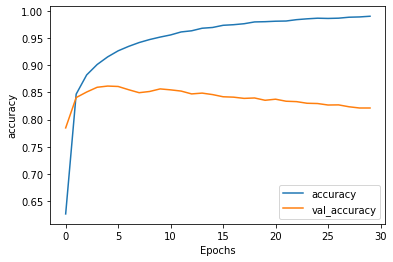

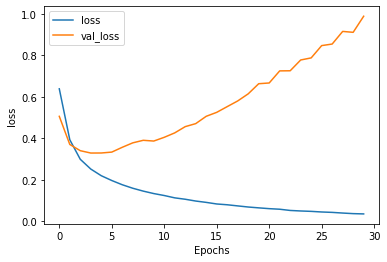

In [110]:
loss, acc = model.evaluate(testing_padded, testing_labels, verbose=0)
print("loss: {:6.3f}, accuracy: {:6.3f}%".format(loss, acc*100))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

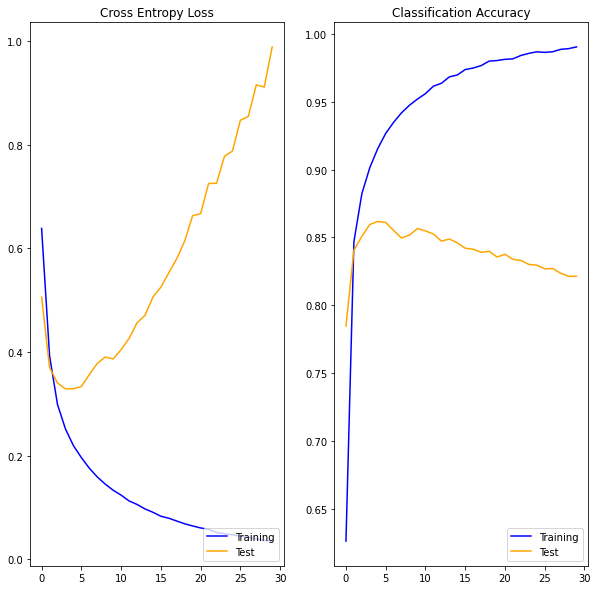

In [111]:
summarize_diagnostics(history)

Get the reversed index from the tokenizer

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [113]:
# get the first 5 values by the key 1 to 5:
for (key, value) in enumerate(word_index.items()):
  if key == 5:
    break
  else:
    print(f'{reverse_word_index.get(key)}')

None
<OOV>
to
of
the


In [114]:
def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

suspect wins over detectives with <OOV> files' reference ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
experts advise against throwing laptop across office even though it will feel incredible
1


In [115]:
# get the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [119]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night","Her voice was dripping with sarcasm and, Cole noted with amusement, jealousy."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
score = model.predict(padded)
print(score)
predict_class = ['non-sacrasm', 'sarcasm']
for sent_score in score:
  if sent_score >= 0.5:
    print(predict_class[1])
  else:
    print(predict_class[0])

[[9.9454981e-01]
 [4.4951244e-07]
 [9.9704629e-01]]
sarcasm
non-sacrasm
sarcasm


Use a LSTM

Text Generation by LSTM

In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [121]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O ./irish-lyrics-eof.txt

--2020-05-25 07:57:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘./irish-lyrics-eof.txt’

./irish-lyrics-eof. 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-05-25 07:57:53 (96.5 MB/s) - ‘./irish-lyrics-eof.txt’ saved [68970/68970]



In [0]:
tokenizer = Tokenizer()

In [0]:
data = open('./irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

In [127]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [0]:
input_sequences = []
token_list = tokenizer.texts_to_sequences([corpus[1]])[0]

In [0]:
for line in corpus:
  # remove the outer list wrapper
	token_list = tokenizer.texts_to_sequences([line])[0] 
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [134]:
# show some words' index in the tokenizer
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [150]:
print(f'Total lines: {len(corpus)}')
print(f'Total amount of word in the corpus {total_words}')
print(xs.shape)
print(f'Max sequence length: {max_sequence_len}')

Total lines: 1693
Total amount of word in the corpus 2690
(12038, 15)
Max sequence length: 16


In [148]:
print('The 6th row of the sequence\n')
print(xs[5])
print(ys[5])
print('\n')
print('The 7th row of the sequence\n')
print(xs[6])
print(ys[6])

The 6th row of the sequence

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


The 7th row of the sequence

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]


In [149]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)

Epoch 1/10
377/377 [==============================] - 4s 12ms/step - loss: 6.6591 - accuracy: 0.0732
Epoch 2/10
377/377 [==============================] - 4s 12ms/step - loss: 5.7541 - accuracy: 0.1131
Epoch 3/10
377/377 [==============================] - 4s 11ms/step - loss: 4.8730 - accuracy: 0.1661
Epoch 4/10
377/377 [==============================] - 4s 12ms/step - loss: 3.9652 - accuracy: 0.2366
Epoch 5/10
377/377 [==============================] - 5s 12ms/step - loss: 3.1251 - accuracy: 0.3336
Epoch 6/10
377/377 [==============================] - 5s 12ms/step - loss: 2.4268 - accuracy: 0.4503
Epoch 7/10
377/377 [==============================] - 5s 12ms/step - loss: 1.9353 - accuracy: 0.5472
Epoch 8/10
377/377 [==============================] - 5s 12ms/step - loss: 1.6209 - accuracy: 0.6111
Epoch 9/10
377/377 [==============================] - 4s 12ms/step - loss: 1.3775 - accuracy: 0.6681
Epoch 10/10
377/377 [==============================] - 5s 12ms/step - loss: 1.1793 - accura

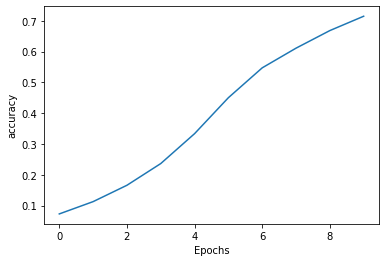

In [152]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [158]:
seed_text = "I've got a bad feeling about this"
next_words = 100
token_list = tokenizer.texts_to_sequences([seed_text])[0]
print(token_list)
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
token_list
predicted = model.predict_classes(token_list, verbose=0)
print(predicted)

[247, 5, 881, 813, 2061, 70]
[2221]


In [153]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this hiii here only my spirit gently stealing came oer the dim weeping dawn gone gone gone gone gone gone gone gone alas gone alas now guinea bore bride my love gone gone gone gone gone gone alas gone alas gone alas gone gone gone gone gone gone gone gone gone alas gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone gone


In [0]:
!pip install docx2txt

In [0]:
import docx2txt
 
# read in word file
result = docx2txt.process('ehr_001.docx')

In [0]:
print(result)